# Trabajo Práctico1 : Análisis de Datos Meteorológicos 

### Carga de Datos:

1. Importar el conjunto de datos utilizando Pandas.

In [1]:
import pandas as pd

# Cargamos el conjunto de datos
file = 'weatherAUS.csv'
df = pd.read_csv(file)

2. ¿Cuántas filas y columnas tiene el dataset?

In [2]:
num_filas, num_columnas = df.shape

print(f"El dataset tiene {num_filas} filas y {num_columnas} columnas.")

El dataset tiene 145460 filas y 23 columnas.


3. ¿Qué atributos presenta el dataset y qué describen? ¿Qué tipos de datos tiene cada atributo?

In [3]:
# Información sobre los atributos y tipos de datos del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

4. Verifica la consistencia de los tipos de datos y realizar conversiones si es necesario.

In [4]:
# Convertimos la columna 'Date' a tipo datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Convertimos las columnas de categorías a tipo category
categorical_columns = ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
for column in categorical_columns:
    df[column] = df[column].astype('category')

# Mostramos los tipos de datos después de las conversiones
df.dtypes

Date             datetime64[ns]
Location                 object
MinTemp                 float64
MaxTemp                 float64
Rainfall                float64
Evaporation             float64
Sunshine                float64
WindGustDir            category
WindGustSpeed           float64
WindDir9am             category
WindDir3pm             category
WindSpeed9am            float64
WindSpeed3pm            float64
Humidity9am             float64
Humidity3pm             float64
Pressure9am             float64
Pressure3pm             float64
Cloud9am                float64
Cloud3pm                float64
Temp9am                 float64
Temp3pm                 float64
RainToday              category
RainTomorrow           category
dtype: object

5. ¿Existen valores faltantes en algunos atributos? ¿Cuáles son las tres columnas con más valores faltantes y cuál es el porcentaje de valores faltantes en cada una? 

In [5]:
# Verificamos si existen valores faltantes en cada columna
valores_faltantes = df.isnull().sum()

# Calculamos el porcentaje de valores faltantes para cada columna
porcentaje_faltantes = (valores_faltantes / len(df)) * 100

# Creamos un DataFrame con la información de valores faltantes y su porcentaje
faltantes_df = pd.DataFrame({
    'Valores Faltantes': valores_faltantes,
    'Porcentaje Faltantes': porcentaje_faltantes
})

# Ordenamos el DataFrame por el porcentaje de valores faltantes en orden descendente
faltantes_df = faltantes_df.sort_values(by='Porcentaje Faltantes', ascending=False)

# Mostramos las tres columnas con más valores faltantes
faltantes_df.head(3)

,Valores Faltantes,Porcentaje Faltantes
Sunshine,69835,48.009762
Evaporation,62790,43.166506
Cloud3pm,59358,40.807095


6. Para las columnas numéricas, obtener métricas de estadística descriptiva (media, mediana y cuartiles). Hint: usa el método `.describe()`.

In [6]:
df.describe()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,145460,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,2013-04-04 21:08:51.907053568,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
min,2007-11-01 00:00:00,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,2011-01-11 00:00:00,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,2013-06-02 00:00:00,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,2015-06-14 00:00:00,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,2017-06-25 00:00:00,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000
std,NaN,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665


### Limpieza y Preprocesamiento de Datos:

1. Ordene el dataset por ciudad y fecha de forma ascendente.

In [7]:
# Ordenar el dataset por ciudad ('Location') y fecha ('Date') de forma ascendente
df = df.sort_values(by=['Location', 'Date'])

# Mostrar las primeras filas del DataFrame ordenado para verificar
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
96320,2008-07-01,Adelaide,8.8,15.7,5.0,1.6,2.6,NW,48.0,SW,...,92.0,67.0,1017.4,1017.7,NaN,NaN,13.5,14.9,Yes,No
96321,2008-07-02,Adelaide,12.7,15.8,0.8,1.4,7.8,SW,35.0,SSW,...,75.0,52.0,1022.4,1022.6,NaN,NaN,13.7,15.5,No,No
96322,2008-07-03,Adelaide,6.2,15.1,0.0,1.8,2.1,W,20.0,NNE,...,81.0,56.0,1027.8,1026.5,NaN,NaN,9.3,13.9,No,No
96323,2008-07-04,Adelaide,5.3,15.9,0.0,1.4,8.0,NNE,30.0,NNE,...,71.0,46.0,1028.7,1025.6,NaN,NaN,10.2,15.3,No,No
96324,2008-07-05,Adelaide,9.8,15.4,0.0,NaN,0.9,N,30.0,NNE,...,56.0,67.0,1023.6,1020.2,NaN,NaN,11.3,13.8,No,NaN


2. Complete los valores faltantes de todas las columnas menos `RainToday`, `RainTomorrow`, `Cloud9am` y `Cloud3pm`
usando [FowardFill](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.ffill.html).

In [8]:
# Lista de columnas a excluir del Forward Fill
columnas_excluir = ['RainToday', 'RainTomorrow', 'Cloud9am', 'Cloud3pm']

# Aplicar Forward Fill a todas las columnas excepto las excluidas
df_ffill = df.drop(columns=columnas_excluir).ffill()

# Recombinar el DataFrame con las columnas excluidas
df[columnas_excluir] = df[columnas_excluir]
df = pd.concat([df_ffill, df[columnas_excluir]], axis=1)

# Verificar los cambios
df.isnull().sum()


Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation          0
Sunshine             0
WindGustDir          0
WindGustSpeed        0
WindDir9am           0
WindDir3pm           0
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Pressure3pm          0
Temp9am              0
Temp3pm              0
RainToday         3261
RainTomorrow      3267
Cloud9am         55888
Cloud3pm         59358
dtype: int64

3. Modifique en las columnas `RainToday` y `RainTomorrow` reemplazando `Yes` con `1` y `No` con `0`.

In [10]:
# Reemplazar 'Yes' con 1 y 'No' con 0 en las columnas 'RainToday' y 'RainTomorrow'
df['RainToday'] = df['RainToday'].replace({'Yes': 1, 'No': 0})
df['RainTomorrow'] = df['RainTomorrow'].replace({'Yes': 1, 'No': 0})

# Verificar los cambios
df[['RainToday', 'RainTomorrow']].head()

,RainToday,RainTomorrow
96320,1,0
96321,0,0
96322,0,0
96323,0,0
96324,0,NaN


4. Según el dataset, la columna `RainToday` se define como `1` si `Rainfall` supera los 1 mm, sino es 0. Utilice 
esta información para completar los datos faltantes de la columna `RainToday`.

In [11]:
# Identificar las filas donde RainToday es nulo y Rainfall es mayor a 1 mm
condicion_uno = (df['RainToday'].isnull()) & (df['Rainfall'] > 1.0)

# Completar RainToday con 1 donde se cumpla la condición
df.loc[condicion_uno, 'RainToday'] = 1

# Identificar las filas donde RainToday es nulo y Rainfall es menor o igual a 1 mm
condicion_dos = (df['RainToday'].isnull()) & (df['Rainfall'] <= 1.0)

# Completar RainToday con 0 donde se cumpla la condición
df.loc[condicion_dos, 'RainToday'] = 0

# Verificar que no queden valores nulos en RainToday
df['RainToday'].isnull().sum()


np.int64(0)

5. Complete los valores faltantes de las columnas `Cloud9am` y `Cloud3pm` usando la mediana de cada una por ciudad.

In [12]:
# Función para completar los valores faltantes usando la mediana por ciudad
def completar_con_mediana_por_ciudad(df, column):
    mediana_por_ciudad = df.groupby('Location')[column].transform('median')
    df[column] = df[column].fillna(mediana_por_ciudad)
    return df

# Completar los valores faltantes en 'Cloud9am' y 'Cloud3pm' usando la mediana por ciudad
df = completar_con_mediana_por_ciudad(df, 'Cloud9am')
df = completar_con_mediana_por_ciudad(df, 'Cloud3pm')

# Verificar los cambios
df[['Cloud9am', 'Cloud3pm']].isnull().sum()


Cloud9am    34967
Cloud3pm    34967
dtype: int64

6. Elimine del dataset la primera fecha de cada ciudad.

In [13]:
# Ordenar el dataset por ciudad y fecha
df = df.sort_values(by=['Location', 'Date'])

# Crear un índice que identifique la primera fila de cada ciudad
primera_fila_por_ciudad = df.groupby('Location').head(1).index

# Eliminar las primeras filas de cada ciudad
df = df.drop(primera_fila_por_ciudad)

# Verificar el resultado
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Cloud9am,Cloud3pm
96321,2008-07-02,Adelaide,12.7,15.8,0.8,1.4,7.8,SW,35.0,SSW,...,75.0,52.0,1022.4,1022.6,13.7,15.5,0,0,NaN,NaN
96322,2008-07-03,Adelaide,6.2,15.1,0.0,1.8,2.1,W,20.0,NNE,...,81.0,56.0,1027.8,1026.5,9.3,13.9,0,0,NaN,NaN
96323,2008-07-04,Adelaide,5.3,15.9,0.0,1.4,8.0,NNE,30.0,NNE,...,71.0,46.0,1028.7,1025.6,10.2,15.3,0,0,NaN,NaN
96324,2008-07-05,Adelaide,9.8,15.4,0.0,1.4,0.9,N,30.0,NNE,...,56.0,67.0,1023.6,1020.2,11.3,13.8,0,NaN,NaN,NaN
96325,2008-07-06,Adelaide,11.3,15.7,0.0,1.4,1.5,NNW,52.0,NNE,...,62.0,62.0,1019.5,1016.2,13.0,14.4,0,1,NaN,NaN


### Análisis Exploratorio de Datos:

1. Obtenga el top 5 de mayor temperatura media y el top 5 de menor temperatura media.

In [14]:
# Crear una nueva columna 'TempMedia' que es el promedio de 'MinTemp' y 'MaxTemp'
df['TempMedia'] = df[['MinTemp', 'MaxTemp']].mean(axis=1)

# Calcular la temperatura media por ciudad
temp_media_por_ciudad = df.groupby('Location')['TempMedia'].mean().reset_index()

# Obtener el top 5 de ciudades con mayor temperatura media
top_5_ciudades_mayor_temp_media = temp_media_por_ciudad.nlargest(5, 'TempMedia')

# Obtener el top 5 de ciudades con menor temperatura media
top_5_ciudades_menor_temp_media = temp_media_por_ciudad.nsmallest(5, 'TempMedia')

# Mostrar los resultados
print("Top 5 de ciudades con mayor temperatura media:")
print(top_5_ciudades_mayor_temp_media)

print("\nTop 5 de ciudades con menor temperatura media:")
print(top_5_ciudades_menor_temp_media)


Top 5 de ciudades con mayor temperatura media:
      Location  TempMedia
13      Darwin  27.875689
16   Katherine  27.763158
8       Cairns  25.387693
39  Townsville  24.890441
41       Uluru  22.414743

Top 5 de ciudades con menor temperatura media:
       Location  TempMedia
23  MountGinini   7.577295
5      Ballarat  12.828447
17   Launceston  13.391461
15       Hobart  13.473214
33     Portland  13.822174


2. Repita el proceso para la temperatura a las 3pm. ¿Son las mismas ciudades las que aparecen en ambos tops? 

In [16]:
# Calcular la temperatura promedio a las 3pm por ciudad
temp_3pm_por_ciudad = df.groupby('Location')['Temp3pm'].mean().reset_index()

# Obtener el top 5 de mayor temperatura a las 3pm
top_5_mayor_temp_3pm = temp_3pm_por_ciudad.nlargest(5, 'Temp3pm')

# Obtener el top 5 de menor temperatura a las 3pm
top_5_menor_temp_3pm = temp_3pm_por_ciudad.nsmallest(5, 'Temp3pm')

# Mostrar los resultados
print("Top 5 de mayor temperatura a las 3pm:")
print(top_5_mayor_temp_3pm)

print("\nTop 5 de menor temperatura a las 3pm:")
print(top_5_menor_temp_3pm)

# Comparar las ciudades de ambos tops
ciudades_mayor_temp_media = set(top_5_ciudades_mayor_temp_media['Location'])
ciudades_menor_temp_media = set(top_5_ciudades_menor_temp_media['Location'])
ciudades_mayor_temp_3pm = set(top_5_mayor_temp_3pm['Location'])
ciudades_menor_temp_3pm = set(top_5_menor_temp_3pm['Location'])

# Verificar si son las mismas ciudades
print("\n¿Son las mismas ciudades en el top de mayor temperatura media y a las 3pm?")
print(ciudades_mayor_temp_media == ciudades_mayor_temp_3pm)

print("\n¿Son las mismas ciudades en el top de menor temperatura media y a las 3pm?")
print(ciudades_menor_temp_media == ciudades_menor_temp_3pm)



Top 5 de mayor temperatura a las 3pm:
        Location    Temp3pm
16     Katherine  32.410399
13        Darwin  31.082362
41         Uluru  29.060241
3   AliceSprings  28.012274
8         Cairns  27.908193

Top 5 de menor temperatura a las 3pm:
       Location    Temp3pm
23  MountGinini  10.059164
15       Hobart  16.173246
33     Portland  16.527394
5      Ballarat  16.792827
1        Albany  17.403027

¿Son las mismas ciudades en el top de mayor temperatura media y a las 3pm?
False

¿Son las mismas ciudades en el top de menor temperatura media y a las 3pm?
False


3. ¿Cuál es la ciudad que registró la mayor cantidad de precipitación en un solo día? ¿Cuánto mm de lluvia se registró?

In [17]:
# Encontrar la fila con la mayor cantidad de precipitación
mayor_precipitacion = df.loc[df['Rainfall'].idxmax()]

# Obtener la ciudad, fecha y cantidad de precipitación
ciudad_mayor_precipitacion = mayor_precipitacion['Location']
fecha_mayor_precipitacion = mayor_precipitacion['Date']
cantidad_mayor_precipitacion = mayor_precipitacion['Rainfall']

# Mostrar los resultados
print(f"La ciudad que registró la mayor cantidad de precipitación en un solo día es {ciudad_mayor_precipitacion}.")
print(f"Fecha: {fecha_mayor_precipitacion}")
print(f"Cantidad de precipitación: {cantidad_mayor_precipitacion} mm")


La ciudad que registró la mayor cantidad de precipitación en un solo día es CoffsHarbour.
Fecha: 2009-11-07 00:00:00
Cantidad de precipitación: 371.0 mm


4. ¿Cuál es la ciudad con la menor cantidad de lluvias registradas? 

In [18]:
# Calcular la suma de precipitaciones para cada ciudad
suma_precipitaciones_por_ciudad = df.groupby('Location')['Rainfall'].sum()

# Encontrar la ciudad con la menor cantidad de lluvias registradas
ciudad_menor_lluvias = suma_precipitaciones_por_ciudad.idxmin()
cantidad_menor_lluvias = suma_precipitaciones_por_ciudad.min()

# Mostrar los resultados
print(f"La ciudad con la menor cantidad de lluvias registradas es {ciudad_menor_lluvias}.")
print(f"Cantidad total de lluvias registradas: {cantidad_menor_lluvias} mm")


La ciudad con la menor cantidad de lluvias registradas es Nhil.
Cantidad total de lluvias registradas: 1473.4 mm


5. Para las 10 ciudades obtenidas en el punto 1, calcule la dirección del viento más fuerte que más veces ocurrió.

In [19]:
# Unir las dos listas de ciudades obtenidas en el punto 1
ciudades_interes = pd.concat([top_5_ciudades_mayor_temp_media, top_5_ciudades_menor_temp_media])

# Filtrar el DataFrame original para las ciudades de interés
df_ciudades_interes = df[df['Location'].isin(ciudades_interes['Location'])]

# Inicializar un diccionario para almacenar la dirección del viento más fuerte para cada ciudad
direccion_viento_fuerte = {}

# Calcular la dirección del viento más fuerte para cada ciudad
for ciudad in ciudades_interes['Location']:
    df_ciudad = df_ciudades_interes[df_ciudades_interes['Location'] == ciudad]
    # Encontrar la dirección del viento más frecuente cuando la velocidad del viento es máxima
    viento_fuerte = df_ciudad.loc[df_ciudad['WindGustSpeed'].idxmax()]
    direccion_viento_fuerte[ciudad] = viento_fuerte['WindGustDir']

# Mostrar los resultados
for ciudad, direccion in direccion_viento_fuerte.items():
    print(f"Ciudad: {ciudad}, Dirección del viento más fuerte: {direccion}")




Ciudad: Darwin, Dirección del viento más fuerte: W
Ciudad: Katherine, Dirección del viento más fuerte: NW
Ciudad: Cairns, Dirección del viento más fuerte: W
Ciudad: Townsville, Dirección del viento más fuerte: E
Ciudad: Uluru, Dirección del viento más fuerte: E
Ciudad: MountGinini, Dirección del viento más fuerte: WNW
Ciudad: Ballarat, Dirección del viento más fuerte: NNW
Ciudad: Launceston, Dirección del viento más fuerte: NNW
Ciudad: Hobart, Dirección del viento más fuerte: NW
Ciudad: Portland, Dirección del viento más fuerte: W


6. ¿Cuál es la ciudad que experimentó la mayor amplitud térmica en un solo día? ¿Y cuál es la ciudad que, en promedio, 
presenta la mayor amplitud térmica diaria?

In [20]:
# Calcular la amplitud térmica diaria
df['AmplitudTermica'] = df['MaxTemp'] - df['MinTemp']

# Encontrar la fila con la mayor amplitud térmica en un solo día
mayor_amplitud_termica = df.loc[df['AmplitudTermica'].idxmax()]

# Obtener la ciudad y la amplitud térmica
ciudad_mayor_amplitud_termica_dia = mayor_amplitud_termica['Location']
amplitud_termica_max_dia = mayor_amplitud_termica['AmplitudTermica']

# Calcular la amplitud térmica promedio diaria para cada ciudad
amplitud_termica_promedio = df.groupby('Location')['AmplitudTermica'].mean()

# Encontrar la ciudad con la mayor amplitud térmica promedio
ciudad_mayor_amplitud_termica_promedio = amplitud_termica_promedio.idxmax()
amplitud_termica_max_promedio = amplitud_termica_promedio.max()

# Mostrar los resultados
print(f"La ciudad que experimentó la mayor amplitud térmica en un solo día es {ciudad_mayor_amplitud_termica_dia}.")
print(f"Amplitud térmica: {round(amplitud_termica_max_dia, 3)} °C")  # Redondear a 2 decimales

print(f"\nLa ciudad que, en promedio, presenta la mayor amplitud térmica diaria es {ciudad_mayor_amplitud_termica_promedio}.")
print(f"Amplitud térmica promedio: {round(amplitud_termica_max_promedio, 2)} °C")  # Redondear a 2 decimales


La ciudad que experimentó la mayor amplitud térmica en un solo día es Dartmoor.
Amplitud térmica: 31.5 °C

La ciudad que, en promedio, presenta la mayor amplitud térmica diaria es AliceSprings.
Amplitud térmica promedio: 16.1 °C


7. Calcule la correlación entre `RainTomorrow` y todos los atributos. ¿Cuáles tienen mayor correlación?

In [21]:
# Asegurarse de que RainTomorrow esté en formato numérico
df['RainTomorrow'] = df['RainTomorrow'].astype(float)

# Seleccionar solo las columnas numéricas
df_numerico = df.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación
correlacion = df_numerico.corr()

# Extraer las correlaciones de RainTomorrow con otros atributos
correlacion_rain_tomorrow = correlacion['RainTomorrow'].drop('RainTomorrow')

# Ordenar las correlaciones por valor absoluto
correlacion_ordenada = correlacion_rain_tomorrow.abs().sort_values(ascending=False)

# Mostrar las mayores correlaciones
print("Correlaciones con RainTomorrow:")
print(correlacion_ordenada)

# Mostrar los atributos con mayor correlación positiva y negativa
atributos_mayor_correlacion = correlacion_ordenada.head(5)
print("\nAtributos con mayor correlación positiva con RainTomorrow:")
print(atributos_mayor_correlacion)



Correlaciones con RainTomorrow:
Humidity3pm        0.434142
AmplitudTermica    0.336727
Cloud3pm           0.317221
Cloud9am           0.257740
Humidity9am        0.251407
Sunshine           0.247728
Rainfall           0.236724
Pressure9am        0.229418
Pressure3pm        0.209716
WindGustSpeed      0.201047
Temp3pm            0.191274
MaxTemp            0.159251
WindSpeed9am       0.090079
WindSpeed3pm       0.086559
MinTemp            0.083404
TempMedia          0.047560
Temp9am            0.027427
Evaporation        0.012078
Name: RainTomorrow, dtype: float64

Atributos con mayor correlación positiva con RainTomorrow:
Humidity3pm        0.434142
AmplitudTermica    0.336727
Cloud3pm           0.317221
Cloud9am           0.257740
Humidity9am        0.251407
Name: RainTomorrow, dtype: float64


### Visualización de Datos:

1. De las 10 ciudades obtenidas del punto 1 del Análisis Exploratorio de Datos, grafique la temperatura a las 3pm a lo 
largo del tiempo. ¿Se observa estacionalidad?

/tmp/ipykernel_8843/197619789.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ciudades_interes['Date'] = pd.to_datetime(df_ciudades_interes['Date'])


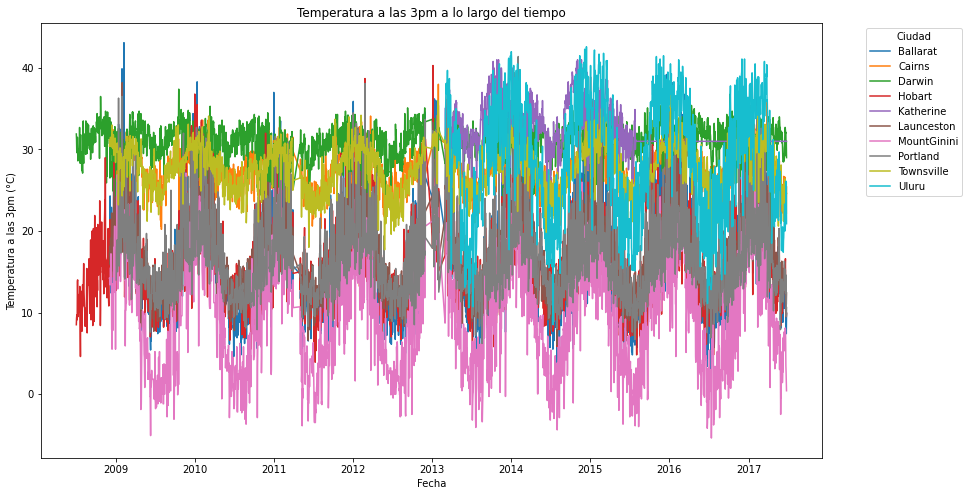

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

#la columna 'Date' sea de tipo datetime
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

# Obtener las ciudades con mayor y menor temperatura media
top_5_mayor_temp_media_ciudades = top_5_mayor_temp_media['Location'].unique()
top_5_menor_temp_media_ciudades = top_5_menor_temp_media['Location'].unique()
print (top_5_mayor_temp_media_ciudades)
print(top_5_menor_temp_media_ciudades)

# Combinar para obtener las ciudades
top_ciudades = list(top_5_mayor_temp_media_ciudades) + list(top_5_menor_temp_media_ciudades)

# Filtrar el DataFrame original para incluir solo estas ciudades
df_top_10 = df[df['Location'].isin(top_ciudades)]

# Crear el gráfico
plt.figure(figsize=(14, 8))
sns.lineplot(data=df_top_10, x='Date', y='Temp3pm', hue='Location', palette='tab10')

# Configurar el gráfico
plt.title('Temperatura a las 3pm en las ciudades con mayor y menor temperatura media')
plt.xlabel('Fecha')
plt.ylabel('Temperatura a las 3pm (°C)')
plt.legend(title='Ciudad', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()



2. Realice el mismo proceso para la columna `RainToday`. ¿Se observa estacionalidad en la incidencia de lluvia?

3. Para la ciudad de `Sydney`, trace en un mismo gráfico todas las series temporales de temperatura entre los años 2012 
y 2014.

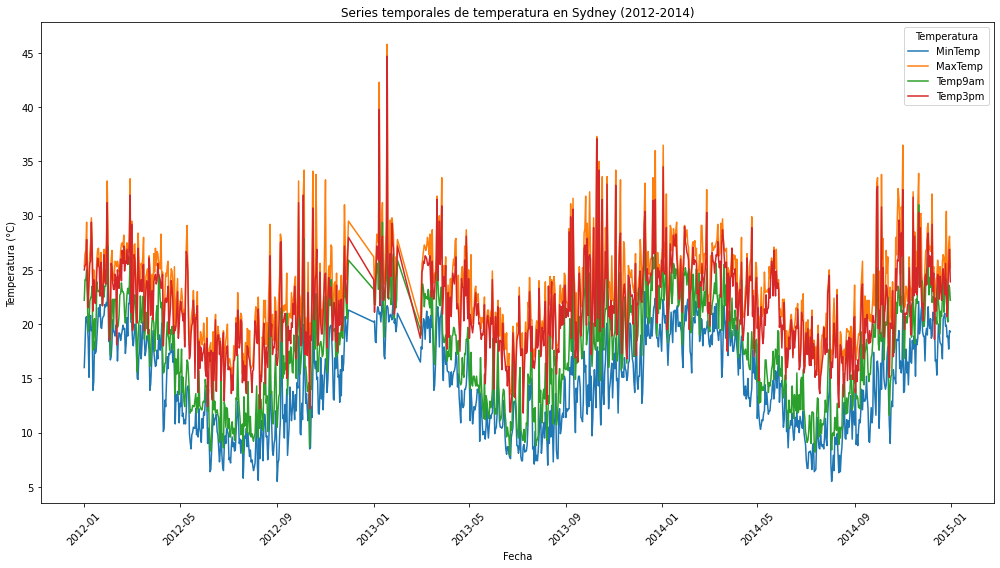

In [19]:
# Filtramos los datos de Sydney entre los años 2012 y 2014 y creamos una copia del DataFrame
df_sydney = df[(df['Location'] == 'Sydney') & (df['Date'] >= '2012-01-01') & (df['Date'] <= '2014-12-31')].copy()

# Convertimos la columna 'Date' a tipo datetime si no lo está
df_sydney['Date'] = pd.to_datetime(df_sydney['Date'])

# Crear el gráfico
plt.figure(figsize=(14, 8))

# Graficamos las series temporales de temperatura
plt.plot(df_sydney['Date'], df_sydney['MinTemp'], label='MinTemp')
plt.plot(df_sydney['Date'], df_sydney['MaxTemp'], label='MaxTemp')
plt.plot(df_sydney['Date'], df_sydney['Temp9am'], label='Temp9am')
plt.plot(df_sydney['Date'], df_sydney['Temp3pm'], label='Temp3pm')

# Configurar el gráfico
plt.title('Series temporales de temperatura en Sydney (2012-2014)')
plt.xlabel('Fecha')
plt.ylabel('Temperatura (°C)')
plt.legend(title='Temperatura')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()



4. Para las ciudades del punto 1 del Análisis Exploratorio de Datos, genere un diagrama de caja comparativo para 
`WindSpeed9am` y otro para `MaxTemp`.

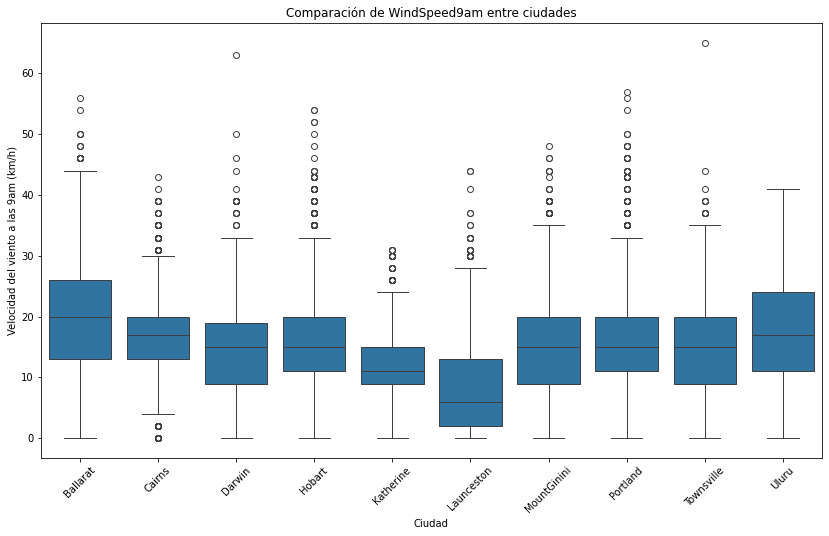

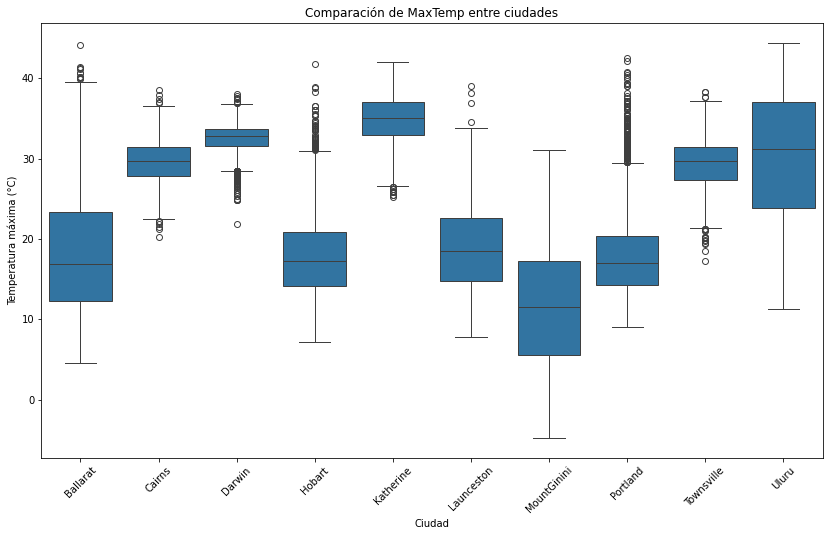

In [20]:
# Identificar las ciudades obtenidas del punto 1 del Análisis Exploratorio de Datos
ciudades_top = top_5_mayor_temp_media['Location'].unique().tolist() + top_5_menor_temp_media['Location'].unique().tolist()

# Filtrar los datos para obtener solo las filas correspondientes a estas ciudades
df_top_ciudades = df[df['Location'].isin(ciudades_top)]

# Crear el diagrama de caja para WindSpeed9am
plt.figure(figsize=(14, 8))
sns.boxplot(x='Location', y='WindSpeed9am', data=df_top_ciudades)
plt.title('Diagrama de caja comparativo para WindSpeed9am')
plt.xlabel('Ciudad')
plt.ylabel('WindSpeed9am (km/h)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Crear el diagrama de caja para MaxTemp
plt.figure(figsize=(14, 8))
sns.boxplot(x='Location', y='MaxTemp', data=df_top_ciudades)
plt.title('Diagrama de caja comparativo para MaxTemp')
plt.xlabel('Ciudad')
plt.ylabel('MaxTemp (°C)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



5. Para las ciudades del punto 3 y 4 del Análisis Exploratorio de Datos, cree un diagrama de barras que muestre la 
cantidad de `Rainfall` por año.

In [22]:
# Filtramos los datos para las ciudades 
ciudades_interes = [ciudad_menor_lluvias, ciudad_mayor_precipitacion]
df_ciudades_interes = df[df['Location'].isin(ciudades_interes)].copy()

# Convertir la columna 'Date' a datetime 
df_ciudades_interes.loc[:, 'Date'] = pd.to_datetime(df_ciudades_interes['Date'])

# Extraer el año de la columna 'Date'
df_ciudades_interes.loc[:, 'Year'] = df_ciudades_interes['Date'].dt.year

# Agrupar por ciudad y año y sumar la precipitación
rainfall_anual = df_ciudades_interes.groupby(['Location', 'Year'])['Rainfall'].sum().reset_index()

# Crear el diagrama de barras
plt.figure(figsize=(14, 8))
sns.barplot(x='Year', y='Rainfall', hue='Location', data=rainfall_anual)
plt.title('Cantidad de Rainfall por año para las ciudades seleccionadas')
plt.xlabel('Año')
plt.ylabel('Rainfall (mm)')
plt.legend(title='Ciudad')
plt.tight_layout()
plt.show()



NameError: name 'ciudad_menor_lluvias' is not defined

6. Realice un gráfico de dispersión entre `WindGustSpeed` y `Pressure9am` para las ciudades del punto 1. Coloree los 
puntos según la variable `RainToday`.

7. Realice un gráfico de dispersión entre `MaxTemp` y `Humidity9am` para las ciudades del punto 1. Coloree los 
puntos según la variable `RainToday`.